# Pakiety

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 14

# Zbiór danych nt. butów męskich
## naszym celem jest przewidzenie ceny - prices_amountmin

In [5]:
# wczytujemy dane 
shoes_df = pd.read_csv('menshoes.csv')

# w tym momencie następuje odruch bezwarunkowy
shoes_df.head()

# jakie wnioski?
# @conclusions
# dzikie id, dużo nanów,
# nie widać wszystkich kolumn
# trzeba wyczyścić

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [7]:

#  Korzystając z przyjaciół przyjrzyjmy się bliżej
shoes_df.info()
# @conclusions
# wyrzucić kolumny - same null/nan
# zasada kciuka > 70% nulli to wyrzacamy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18280 non-null  object 
 1   asins                2161 non-null   object 
 2   brand                18263 non-null  object 
 3   categories           18280 non-null  object 
 4   colors               10344 non-null  object 
 5   count                0 non-null      float64
 6   dateadded            18280 non-null  object 
 7   dateupdated          18280 non-null  object 
 8   descriptions         9704 non-null   object 
 9   dimension            2968 non-null   object 
 10  ean                  9690 non-null   float64
 11  features             13299 non-null  object 
 12  flavors              0 non-null      float64
 13  imageurls            17255 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 18280 non-null 

In [9]:
threshold = shoes_df.shape[0] * 0.7
shoes_df_drop = shoes_df.loc[:, shoes_df.apply(lambda x: x.isna().sum(), axis=0) < threshold]
shoes_df_drop.head(5)

,id,brand,categories,colors,dateadded,dateupdated,descriptions,ean,features,imageurls,...,prices_dateadded,prices_dateseen,prices_issale,prices_merchant,prices_offer,prices_sourceurls,sizes,skus,sourceurls,upc
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,True,NaN,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-04-29T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN


które kolumny jeszcze wydają się niepotrzebne?  
które kolumny trzeba przekształcić?

In [10]:
# @conclusions
# np. ean, imageURLs; color może być przydatny (białe conversy są droższe zazwyczaj)

# te, które nie są pojedynczą informacją - categories, description,...

In [12]:
# popatrzmy na kolory butów
shoes_df_drop['colors'].value_counts()

# jakie jest ograniczenie metody .value_counts()?
# @conclusion
# duże dysproporcje w kolorach
# dużo małych zbirów

Black                                                                            1364
Brown                                                                             746
Blue                                                                              421
Multicolor                                                                        415
White                                                                             252
                                                                                 ... 
Tigerlily,BlackElectric Green,Bluebird,Black,Electric Green,BluebirdTigerlily       1
Silver ,Antrct ,Black                                                               1
Black,Khaki,Tan                                                                     1
WhiteBlack-Varsity Red                                                              1
SlateNavyWhite                                                                      1
Name: colors, Length: 2080, dtype: int64

In [13]:
# wartości NA
pd.DataFrame(shoes_df_drop['colors']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   colors  10344 non-null  object
dtypes: object(1)
memory usage: 142.9+ KB


jest sporo braków  
pomówimy jak z tym żyć za chwilę  
najpierw wizualizacja  
jakieś pomysły na wizualizację zmienna ciągła vs. kategoryczna?

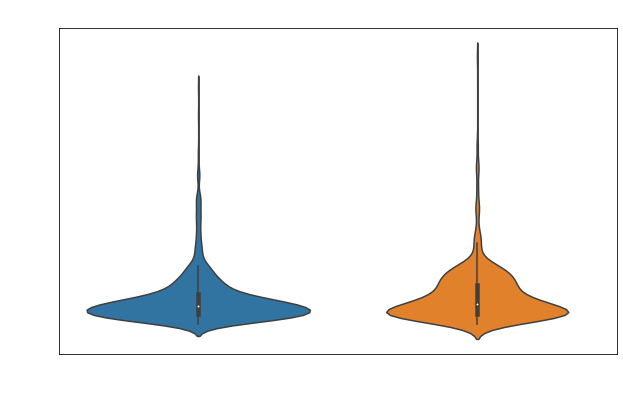

In [14]:
Black_Brown = shoes_df_drop.loc[shoes_df_drop['colors'].isin(['Black', 'Brown'])]
violin_plot = sns.violinplot(Black_Brown['colors'], Black_Brown['prices_amountmin'])
violin_plot.set_title('Rozkład ceny względem koloru butów')
plt.show()

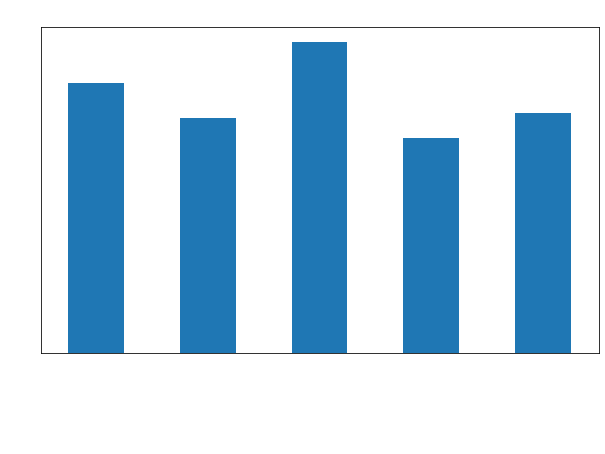

In [16]:
popular_colors=shoes_df_drop.loc[shoes_df_drop['colors'].isin(shoes_df_drop['colors'].value_counts().index[:5])]
mean_price_popular_colors=popular_colors.groupby('colors')['prices_amountmin'].mean()
mean_price_popular_colors.plot(kind='bar', title='Średnia cena')
plt.show()

# Imputacja zmiennych kategorycznych

kolumna colors miała dużo nieuzupełnionych wartości  
jak można je uzupełnić?

In [17]:
# możnaby najczęściej występującym kolorem, ale czy to nie wprowadza fałszywej informacji?
# lepsze podejście - nowa klasa 'Other'
shoes_df_drop['colors'].fillna('Missing_color')  #działa

0        Missing_color
1        Missing_color
2        Missing_color
3        Missing_color
4        Missing_color
             ...      
18275            Black
18276    Missing_color
18277    Missing_color
18278    Missing_color
18279    Missing_color
Name: colors, Length: 18280, dtype: object

In [ ]:
# czy można lepiej?
# można!
shoes_df_drop['missing' + 'colors'] = shoes_df_drop['colors'].isna()*1
shoes_df_drop['colors'].fillna('Missing_color', inplace=True)

# po co ta informacja, skoro w kolumnie już jest napisane, że to brakujący kolor?
# @conclusion


### Uwaga, to co jest wyżej to wcale nie jest prawda  
### przekonamy się o tym przy one hot encoding

# Imputacja zmiennych ciągłych

In [18]:
# w naszym zbiorze nie ma nic do imputacji ciągłej
# zerknijmy na szutczny zbiór
fake_data=pd.DataFrame({'num':np.random.choice([None, 3,4], 100), 
                        'cat': np.random.choice([None, 'Puma','Nike','Adidas'], 100, p=[0.92, 0.03, 0.03, 0.02])})
fake_data.head()

,num,cat
0,4,None
1,None,Nike
2,3,None
3,4,None
4,None,None


In [19]:
# średnia czy mediana?
fake_data.num.fillna(fake_data.num.median(), inplace=True) #fake_data.num.mean()
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     100 non-null    float64
 1   cat     7 non-null      object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


# Outliery

In [20]:
# dane jedynie z przedziału (średnia +- 3 sigma) - ma to sens gdy rozkład normalny
data=pd.DataFrame({'num':np.random.normal(2,0.4,1000)})
factor = 3
upper_lim = data['num'].mean () + data['num'].std () * factor
lower_lim = data['num'].mean () - data['num'].std () * factor

data = data[(data['num'] < upper_lim) & (data['num'] > lower_lim)]
data.shape

(996, 1)

In [22]:
# usuwanie na podstawie skrajnych percentyli
# to już zadziała "dobrze" dla każdego rozkładu
# załadujmy nasz ulubiony Boston
boston_dict = load_boston()
boston_df = pd.DataFrame(boston_dict['data'], columns=boston_dict['feature_names'])

dis_data = boston_df['DIS']
print('Wejściowy rozmiar: ', dis_data.shape[0])

upper_lim = dis_data.quantile(.95)
lower_lim = dis_data.quantile(.05)

data_percentile = dis_data[(dis_data < upper_lim) & (dis_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Pozostało %: ', round(data_percentile.shape[0]/dis_data.shape[0], 2))

# co tu jest nie halo?
# @conclusion
# nawet nie widzieliśmy tych danych

Wejściowy rozmiar:  506
Wyjściowy rozmiar:  452
Pozostało %:  0.89


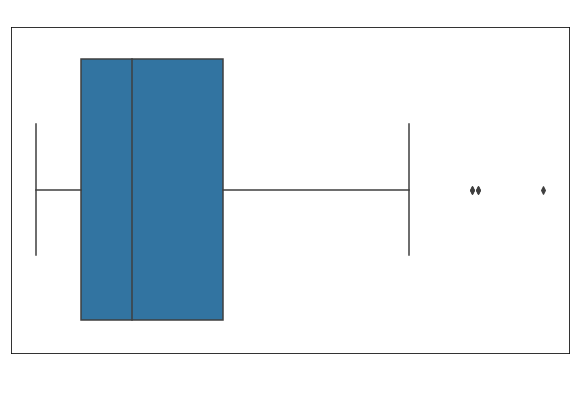

In [23]:
# to może boxplot?
# faktycznie, dołu nie powinniśmy obcinać
# ale na górze są outliery!
plot_box = sns.boxplot(boston_df['DIS'])
plot_box.set_title('Rozkład zmiennej DIS')
plt.show()

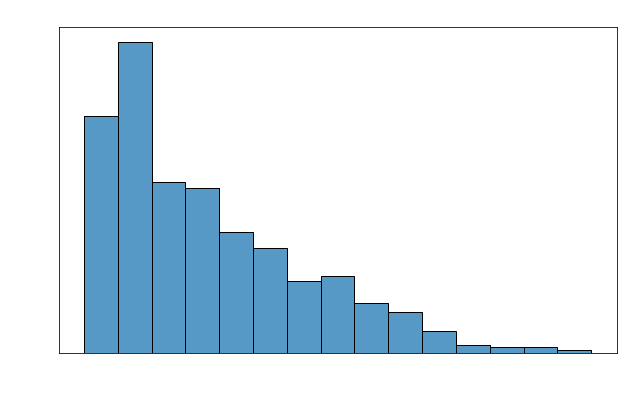

In [24]:
# nope
# ten rozkład taki jest, nie można go za to winić
# tu nie ma outlierów
plot_dens=sns.histplot(boston_df['DIS'])
plot_dens.set_title('Rozkład zmiennej DIS')
plt.show()

#  Grouping & Binning
### Agregujemy klasy do wyższego poziomu lub tniemy zmienną ciągłą na klasy

czasami potrzebujemy zrobić ze zmiennej ciągłej kategoryczną  
albo mamy zmienną kategoryczną o bardzo dużej liczbie klas  
albo dużo klas mało licznych

In [26]:
# zobaczmy jak wygląda kolumna brand 
shoes_df_drop['brand'].value_counts()
# co można z tym zrobić?
# @conclusions
# grupowanie wygląda kusząco

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
DeMarini                      1
Polo Sport Ralph Lauren       1
Christian Lacroix             1
FXR                           1
Bills Khakis                  1
Name: brand, Length: 1856, dtype: int64

In [28]:
# jest aż 560 marek, które występują raz
shoes_df_drop['brand'].value_counts()[shoes_df_drop['brand'].value_counts() == 1].shape[0]

# czyli grupujemy w kategorię Other?
# @conclusion
# nie tak szybko

559

In [29]:
# przyjrzyjmy się bliżej
brands = shoes_df_drop[['brand']].groupby(['brand']).size().sort_values(ascending=False).reset_index()
brands.columns = ['brand', 'count']
brands.loc[brands['brand'].apply(lambda x:'nike' in x.lower())]

,brand,count
0,Nike,1709
42,NIKE,59
371,nike,9
472,Nike Golf,6
920,Nike Jordan Future Low,2
1627,Nike Air Jordan,1
1628,Nike Lunarglide 7,1
1629,Nike SB,1
1647,NIKE - Kobe,1
1648,NIKE AIR JORDAN,1


może warto najpierw zgrupować Najacze a potem dopiero Others?  
Nike i NIKE to na pewno to samo, ale może NIKE - Kobe to dość niszowe obuwie i warto, żeby było Others?  
to samodzielna decyzja

In [30]:
nike_synonyms = brands.loc[brands['brand'].apply(lambda x:'nike' in x.lower()), 'brand'].values

small_classes = shoes_df_drop['brand'].value_counts()[shoes_df_drop['brand'].value_counts() == 1].index

shoes_df_drop['brands' + '_processed'] = np.where(shoes_df_drop['brand'].isin(nike_synonyms), 'nike', 
                                              np.where(shoes_df_drop['brand'].isin(small_classes), 'Other', shoes_df_drop['brand']))

shoes_df_drop['brands' + '_processed'].value_counts()

nike                 1792
PUMA                  574
Other                 552
Ralph Lauren          524
New Balance           361
                     ... 
Rainbow Sandals         2
Victory Tailgate        2
Lexmark                 2
NEFF                    2
Roadmate Boot Co.       2
Name: brands_processed, Length: 1294, dtype: int64

ten proces można iterować

In [31]:
# można to zrobić też przy pomocy słownika
geo=np.random.choice(("Poland",'Chile', 'France', 'Spain'), 100)
geo=pd.Series(geo)
geo

0      Chile
1      Chile
2     France
3     Poland
4      Spain
       ...  
95    France
96    Poland
97     Chile
98     Chile
99     Chile
Length: 100, dtype: object

In [32]:
dict_geo={'Poland': "Europe", "Chile":"South America", "France":"Europe"}
from collections import defaultdict
countries_list = [('Poland','Europe'), ('France','Europe'), ('Chile','South America')]
geo.map(dict_geo)

0     South America
1     South America
2            Europe
3            Europe
4               NaN
          ...      
95           Europe
96           Europe
97    South America
98    South America
99    South America
Length: 100, dtype: object

In [33]:
# metoda z użyciem dict/defaultdict
countries_dict = defaultdict(lambda:'Other')
for continent, country in countries_list:
     countries_dict[continent]=country
geo.map(countries_dict)

0     South America
1     South America
2            Europe
3            Europe
4             Other
          ...      
95           Europe
96           Europe
97    South America
98    South America
99    South America
Length: 100, dtype: object

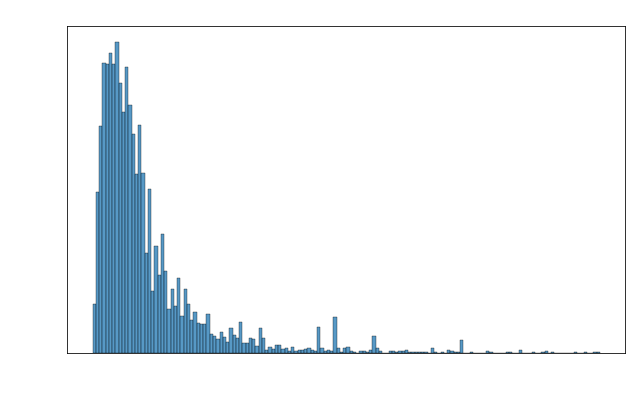

In [34]:
# naszym celem było przewidywanie cen butów
# ale może wystarczy jeśli przewidzimy to bardziej z grubsza? Tanie, średnie, drogie
prices_hist = sns.histplot(shoes_df_drop['prices_amountmin'])
prices_hist.set_title('Rozkład cen butów')
plt.show()

In [37]:
cutted = pd.cut(shoes_df_drop['prices_amountmin'], bins=[0, 100, 200, np.inf], labels=['cheap', 'affordable', 'expensive'])
cutted[18:]

18        expensive
19       affordable
20       affordable
21            cheap
22            cheap
            ...    
18275         cheap
18276         cheap
18277         cheap
18278         cheap
18279         cheap
Name: prices_amountmin, Length: 18262, dtype: category
Categories (3, object): ['cheap' < 'affordable' < 'expensive']

In [38]:
# zawsze warto sprawdzić
cutted[cutted.isna()]

4176     NaN
17862    NaN
18137    NaN
Name: prices_amountmin, dtype: category
Categories (3, object): ['cheap' < 'affordable' < 'expensive']

In [39]:
# i spróbować zrozumieć dlaczego
shoes_df_drop.loc[4176, 'prices_amountmin']

0.0

# Dla przypomnienia - Log Transform

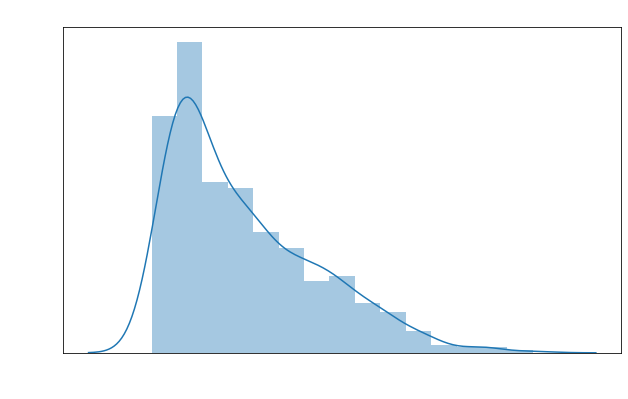

In [40]:
dis_dist = sns.distplot(boston_df['DIS'])
dis_dist.set_title('Rozkład zmiennej DIS')
plt.show()

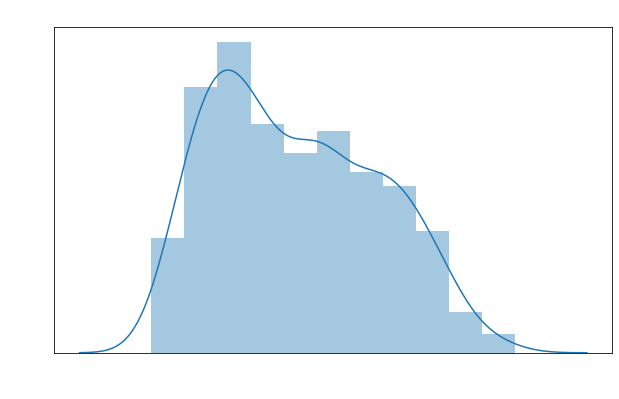

In [41]:
dis_log_dist = sns.distplot(np.log1p(boston_df['DIS']))
dis_log_dist.set_title('Rozkład logarytmu zmiennej DIS')
plt.show()
# nie jest idealnie, ale na pewno mniej skośnie \:)

# Categorical variables encoding
### algorytmy często nie lubią zmiennych kategorycznych

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)

# integer encode
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


Warto zauważyć, że to ma sens, tylko dla zmiennych, które reprezentują jakieś poziomy/kolejność

In [43]:
# uwaga! 
# nie panujemy nad kolejnością -> check OrdinalEncoder
data = ['hot', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
le = LabelEncoder()
integer_encoded = le.fit_transform(values)
print(integer_encoded)

[1 0 2 0 1 1 2 0 2 1]


In [44]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [45]:
# przykład z naszych danych
# kolumna categories wyglądała obiecująco
shoes_df_drop.head()

,id,brand,categories,colors,dateadded,dateupdated,descriptions,ean,features,imageurls,...,prices_dateseen,prices_issale,prices_merchant,prices_offer,prices_sourceurls,sizes,skus,sourceurls,upc,brands_processed
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-05T00:00:00Z,True,NaN,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,Josmo
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-05T00:00:00Z,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,Josmo
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-03-08T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2015-11-30T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-04-29T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,SERVUS BY HONEYWELL


In [46]:
shoes_df_drop['categories'].value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                    3698
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                    1632
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                  698
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                           586
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                             391
                                                                                                              ... 
Shoes,Clothing, Shoes & Jewelry,Men,Boots,Western                                                                1
Uniforms, Work & Safety,Men,Shorts,Work Utility & Safety,Clothing, Shoes & Jewelry,Clothing                      1
Clothing, Shoes & Accessories,Men's Shoes,Boots,See more Timberland Premium Wate

In [47]:
# podrążmy temat
categories = {}
def split_and_count(x, categories):
    cat_list = x.split(',')
    for cat in cat_list:
        categories.setdefault(cat, 0)
        categories[cat] += 1
    return categories

for row in shoes_df_drop['categories'].iteritems():
    split_and_count(row[1], categories)
categories_df = pd.DataFrame.from_dict(categories, orient='index').reset_index()
categories_df.columns = ['category', 'count']
categories_df.sort_values(by='count', ascending=False).head(20)

# kategorie typu athletic, *sport, *outwear mogą się nadawać na one-hot

,category,count
0,Clothing,20258
1,Shoes,9768
2,Men's Shoes,9581
3,All Men's Shoes,6179
23,Shoes & Jewelry,5389
9,Men,3394
7,Shoes & Accessories,3297
15,Men's Clothing,3186
21,All Men's Clothing,1583
4,Men's Casual Shoes,1429


# Scaling
- min-max scaling
- standarization

niektóre algorytmy nie lubią dużych skal zmiennych - regresja liniowa z poprzednich zajęć   
jakiś parametr musi "obsłużyć" bardzo małe i bardzo duże liczby  
inne potrzebują mieć zmienne w konkretnym przedziale

In [49]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
mm_scaler = MinMaxScaler()

print(mm_scaler.fit_transform(data))
# musimy się wcześniej zająć outlierami
# check robust scaler

[[0.        ]
 [0.15789474]
 [0.02631579]
 [0.36842105]
 [0.05263158]
 [0.57894737]
 [0.10526316]
 [1.        ]]


In [50]:
# standarization
from sklearn.preprocessing import StandardScaler
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)
print(np.round(np.mean(scaled_data), 4), np.std(scaled_data))

[[-0.87531175]
 [-0.39238113]
 [-0.79482332]
 [ 0.25152637]
 [-0.71433488]
 [ 0.89543386]
 [-0.553358  ]
 [ 2.18324886]]
-0.0 1.0


# Extracting info from date

In [52]:
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

In [53]:
data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,4,50,Sunday
1,2008-12-04,2008,12,13,147,Thursday
2,1988-06-23,1988,6,33,393,Thursday
3,1999-08-25,1999,8,22,259,Wednesday
4,1993-02-20,1993,2,28,337,Saturday


# warto poczytać
pakiet category_encoders:
- https://kiwidamien.github.io/encoding-categorical-variables.html
- https://pbpython.com/categorical-encoding.html

Ciekawa strona z przykładami wizualizacji (wraz z kodem):
    https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/